<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab14_Neural_networks_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import numpy as np

In [21]:
x_data=np.array([0,0,0,1,1,0,1,1],np.float32).reshape(4,2)
y_data=np.array([0,1,1,0],np.float32).reshape(4,1)

In [22]:
x_data

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [23]:
x_data.shape[1]

2

In [24]:
y_data

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [25]:
input_dim=x_data.shape[1]
units=y_data.shape[1]

input(nxi), output(nxj) i는 인풋 갯수 j는 아웃풋 갯수, n데이터 갯수
W와 b의 갯수는? W는 ixj개, [i,j] b는 j개 [1,j]

# Logistic regression

In [26]:
learning_rate=1e-2

그렇다면 w와 b의 사이즈를 어떻게 정하는가? 일일이 i와 j의 크기를 넣어줘야 하나? 아니면 자동으로 정할 수 있는가?
x_data와 y_data의 dimension을 뽑을수 있으면 가능함.
- x_data.shape[숫자] : 해당숫자-1에 해당하는 dimension을 뽑음.

In [36]:
w_init=tf.random_normal_initializer()
b_init=tf.zeros_initializer()

In [38]:
w1=tf.Variable(initial_value=[[5,-7],[5,-7]],dtype='float32')
b1=tf.Variable(initial_value=[-8,3],dtype='float32')

In [39]:
w2=tf.Variable(initial_value=[[-11],[-11]],dtype='float32')
b2=tf.Variable(initial_value=[6],dtype='float32')

In [40]:
for i in range(10000):
  # loss
  with tf.GradientTape() as tape:
    z1=tf.matmul(x_data,w1)+b1   #매트릭스 곱하기 : np.matmul()
    k1=tf.divide(1,1+tf.math.exp(-z1)) #sigmoid

    z2=tf.matmul(k1,w2)+b2   #매트릭스 곱하기 : np.matmul()
    hypothesis=tf.divide(1,1+tf.math.exp(-z2)) #sigmoid

    loss=-tf.reduce_mean(y_data*tf.math.log(hypothesis)+(1-y_data)*tf.math.log(1-hypothesis)) #cross entropy

  # gradient
  w1_grad,b1_grad,w2_grad,b2_grad=tape.gradient(loss,[w1,b1,w2,b2])

  # updata
  w1.assign_sub(learning_rate*w1_grad)
  b1.assign_sub(learning_rate*b1_grad)
  w2.assign_sub(learning_rate*w2_grad)
  b2.assign_sub(learning_rate*b2_grad)

  # display
  if i % 1000==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 0.011523084715008736
iteration 1000 loss 0.010212266817688942
iteration 2000 loss 0.009532989002764225
iteration 3000 loss 0.009119556285440922
iteration 4000 loss 0.008840661495923996
iteration 5000 loss 0.008637221530079842
iteration 6000 loss 0.008479657582938671
iteration 7000 loss 0.008350270800292492
iteration 8000 loss 0.008239127695560455
iteration 9000 loss 0.008141405880451202


In [41]:
print(w1.numpy(),b1.numpy())

[[ 5.1980047 -7.0336523]
 [ 5.1980047 -7.0336523]] [-7.9059095  3.0396833]


In [42]:
print(w2.numpy(),b2.numpy())

[[-11.2827835]
 [-11.200979 ]] [5.7877946]


In [44]:
z1=tf.matmul(x_data,w1)+b1
k1=tf.divide(1,1+tf.math.exp(-z1))
z2=tf.matmul(k1,w2)+b2
hypothesis=tf.divide(1,1+tf.math.exp(-z2))

hypothesis.numpy()


array([[0.00734875],
       [0.99245924],
       [0.99245924],
       [0.00964699]], dtype=float32)

In [ ]:
tf.divide(1,1+tf.math.exp(-z))

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.0081014 ],
       [0.10678716],
       [0.16386306],
       [0.85614413],
       [0.9767388 ],
       [0.99304587]], dtype=float32)>

In [ ]:
y_data

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# subclassing

In [ ]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self,input_dim,units):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
    self.b=self.add_weight(shape=(units,),initializer='zeros')

  def call(self,inputs):
    logits=tf.matmul(inputs,self.w)+self.b
    return tf.math.sigmoid(logits)

In [ ]:
# loss
loss=tf.keras.losses.BinaryCrossentropy()   #yes no만 있는 crossentropy

In [ ]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [ ]:
# define
model=Model(input_dim,units)
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [ ]:
# learning
for i in range(10000):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

  if i % 2000==0:
    print('{} {}'.format(i,loss(y_data,model(x_data))))


0 0.15634573996067047
2000 0.13510668277740479
4000 0.11899277567863464
6000 0.10636401921510696
8000 0.09620372205972672


In [ ]:
model.w.numpy()

array([[2.0406716],
       [0.7923428]], dtype=float32)

In [ ]:
model.b.numpy()

array([-8.667864], dtype=float32)

In [ ]:
model(x_data)

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.00641608],
       [0.0989013 ],
       [0.14760554],
       [0.8666723 ],
       [0.98040175],
       [0.99429595]], dtype=float32)>

In [ ]:
y_data

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# Sequential model

In [45]:
# model
model=tf.keras.Sequential()

model.add(tf.keras.Input(shape=(input_dim,)))

model.add(tf.keras.layers.Dense(2,activation='sigmoid',kernel_initializer='random_normal'))
model.add(tf.keras.layers.Dense(units,activation='sigmoid',kernel_initializer='random_normal'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


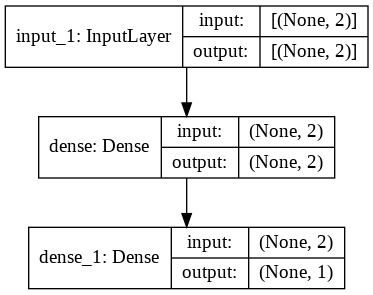

In [47]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [49]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.BinaryCrossentropy())

In [59]:
model.set_weights([np.array([[5,-7],[5,-7]],np.float32),
                   np.array([-8,3],np.float32),
                   np.array([[-11],[-11]],np.float32),
                   np.array([6],np.float32)])

In [60]:
# learning
model.fit(x_data,y_data,epochs=10000,verbose=0)

In [61]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 17ms/step - loss: 0.0081


0.008052087388932705

In [62]:
model.get_weights()

[array([[ 5.1980057, -7.033653 ],
        [ 5.1980057, -7.033653 ]], dtype=float32),
 array([-7.905911 ,  3.0396836], dtype=float32),
 array([[-11.282783],
        [-11.200979]], dtype=float32),
 array([5.7877946], dtype=float32)]

In [63]:
y_data

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [64]:
model.predict(x_data)

array([[0.00734875],
       [0.99245924],
       [0.99245924],
       [0.00964698]], dtype=float32)